In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
def WS(N, k, beta):

    WS = nx.Graph()

    nodes = np.arange(0, N).astype(int)

    links = np.zeros((N,k)).astype(int)
    md = k%2

#     links = np.array([[node, i] for node in nodes for i in range(node - k//2 - md, node + 1 + k//2) if i != node])
    links = [[node, i%N] for node in nodes for i in range(node+1, node + k//2 + 1)]
    WS.add_edges_from(links)
    nw = set()

    for node in nodes:
        neighbors = set(WS.neighbors(node))
        
        for ngb in neighbors:
            if np.random.rand() < beta:
                WS.remove_edge(node, ngb)
                c = np.random.choice(nodes)
                while c == node or c in neighbors or (node, c) in nw:
                    c = np.random.choice(nodes)
                nw.add((node, c))

    
    WS.add_edges_from(nw)
    
    return WS


In [36]:
p_results = {4:[], 8:[], 10:[]}
c_results = {4:[], 8:[], 10:[]}
N = 1000
k_list = [4,8,10]

for i_k, k in enumerate(k_list):
    betas = np.logspace(-4, 0, 15)
                        
    for i_b, beta in enumerate(betas):
                        
        clear_output(wait=True)
        display('k: ' + str(k) + ', '+
                'local progress: {:.0f}'.format(i_b/len(betas)*100)+'%, '+
                'global progress: {:.0f}'.format((i_k*betas.shape[0]+i_b)/(betas.shape[0]*len(k_list))*100)+'%'
               )
                
        ws = WS(N, k, beta)
        sp = nx.shortest_path(ws)
        
        dists = []
        cnt = 0
        for node_paths in sp.values():
            cnt += 1
            dists.append(
                sum([len(path)-1 for path in node_paths.values()])
            )
            
        
            
        nodes = list(ws.nodes())
        counts = []

        for node in ws.nodes():
            counter = 0
            nl = list(ws.neighbors(node))
            for neighbor in nl:
                ns = set(ws.neighbors(neighbor))
                for nb2 in nl:
                    if nb2 in ns:
                        counter += 1

            counts.append([counter, len(nl)])
        
#         p_results[k].append([dists, len(node_paths.values())])
        p_results[k].append([dists, cnt])
        c_results[k].append(counts)

clear_output(wait=True)
display('finished')

'finished'

Avg path length

In [24]:
p_c = {4:[], 8:[], 10:[]}
# print(sum(i[0])/(N*(N-1))/denom)
for i in k_list:
    denom = sum(p_results[i][0][0])/(N*(N-1))
    
    for j in p_results[i]:
    #     p_c.append(sum(i[0])/(N*(N-1))/denom)
        p_c[i].append(sum(j[0])/(N*(N-1))/denom)

Clustering coefficient

In [25]:
c_c = {4:[], 8:[], 10:[]}

for j in k_list:

    for bet in c_results[j]:
        count = 0
    #     p_c.append(sum(i[0])/(N*(N-1))/denom)
        for i in bet:
            if i[1] == 0 or i[1] == 1:
                continue
            count += i[0]/(i[1]*(i[1]-1))

        c_c[j].append(count/N)

    c_c[j] = [i/c_c[j][0] for i in c_c[j]]

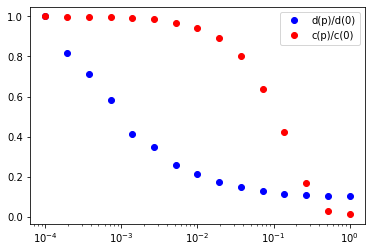

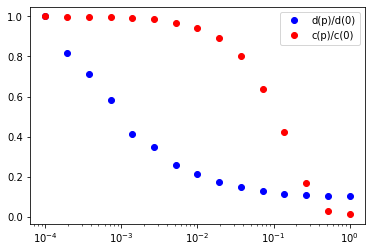

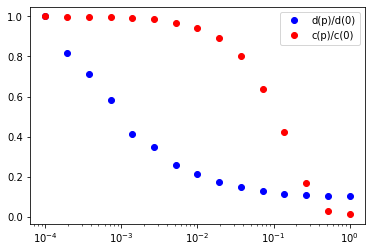

In [26]:
for i in k_list:
    plt.figure()
    plt.plot(np.logspace(-4, 0, 15), p_c[10], 'bo', label="d(p)/d(0)")
    plt.plot(np.logspace(-4, 0, 15), c_c[10], 'ro', label="c(p)/c(0)")
    plt.xscale('log')
    plt.legend()